In [1]:
import numpy as np
import pandas as pd
import os, sys
import matplotlib.pyplot as plt
import seaborn as sns
sys.path.append(os.path.dirname(os.getcwd()))
from src.utils.mining_data_tb import *
from src.utils.vizualitation_tb import *

/home/jose/.local/lib/python3.7/site-packages/pandas/compat/__init__.py:97: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
df = pd.read_csv('../data/phl_exoplanet_catalog.csv')

In [3]:
df.head()

,P_NAME,P_STATUS,P_MASS,P_MASS_ERROR_MIN,P_MASS_ERROR_MAX,P_RADIUS,P_RADIUS_ERROR_MIN,P_RADIUS_ERROR_MAX,P_YEAR,P_UPDATED,...,P_HABZONE_CON,P_TYPE_TEMP,P_HABITABLE,P_ESI,S_CONSTELLATION,S_CONSTELLATION_ABR,S_CONSTELLATION_ENG,P_RADIUS_EST,P_MASS_EST,P_SEMI_MAJOR_AXIS_EST
0,11 Com b,3.0,6165.86330,-476.74200,476.74200,NaN,NaN,NaN,2007,2014-05-14,...,0,Hot,0,0.083813,Coma Berenices,Com,Berenice's Hair,12.082709,6165.86330,1.29
1,11 UMi b,3.0,4684.78480,-794.57001,794.57001,NaN,NaN,NaN,2009,2018-09-06,...,0,Hot,0,0.082414,Ursa Minor,UMi,Little Bear,12.229641,4684.78480,1.53
2,14 And b,3.0,1525.57440,NaN,NaN,NaN,NaN,NaN,2008,2014-05-14,...,0,Hot,0,0.081917,Andromeda,And,Andromeda,12.848516,1525.57440,0.83
3,14 Her b,3.0,1481.07850,-47.67420,47.67420,NaN,NaN,NaN,2002,2018-09-06,...,0,Cold,0,0.145241,Hercules,Her,Hercules,12.865261,1481.07850,2.93
4,16 Cyg B b,3.0,565.73385,-25.42624,25.42624,NaN,NaN,NaN,1996,2018-09-06,...,1,Warm,0,0.368627,Cygnus,Cyg,Swan,13.421749,565.73385,1.66


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4048 entries, 0 to 4047
Columns: 112 entries, P_NAME to P_SEMI_MAJOR_AXIS_EST
dtypes: float64(94), int64(4), object(14)
memory usage: 3.5+ MB


In [5]:
columnas_escogidas = ['P_NAME', 'P_STATUS', 'P_DETECTION', 'P_MASS', 'P_RADIUS', 'P_PERIOD', 'P_ECCENTRICITY', 'P_FLUX', 'P_ESI', 'P_GRAVITY', 'P_DENSITY', 'P_DISTANCE', 'S_DISTANCE', 'S_MASS', 'S_RADIUS_EST', 'S_TYPE', 'S_CONSTELLATION', 'S_RA_H', 'S_DEC_T', 'P_HABZONE_CON']

In [6]:
df = df[df.P_STATUS == 3]
df.head()

,P_NAME,P_STATUS,P_MASS,P_MASS_ERROR_MIN,P_MASS_ERROR_MAX,P_RADIUS,P_RADIUS_ERROR_MIN,P_RADIUS_ERROR_MAX,P_YEAR,P_UPDATED,...,P_HABZONE_CON,P_TYPE_TEMP,P_HABITABLE,P_ESI,S_CONSTELLATION,S_CONSTELLATION_ABR,S_CONSTELLATION_ENG,P_RADIUS_EST,P_MASS_EST,P_SEMI_MAJOR_AXIS_EST
0,11 Com b,3.0,6165.86330,-476.74200,476.74200,NaN,NaN,NaN,2007,2014-05-14,...,0,Hot,0,0.083813,Coma Berenices,Com,Berenice's Hair,12.082709,6165.86330,1.29
1,11 UMi b,3.0,4684.78480,-794.57001,794.57001,NaN,NaN,NaN,2009,2018-09-06,...,0,Hot,0,0.082414,Ursa Minor,UMi,Little Bear,12.229641,4684.78480,1.53
2,14 And b,3.0,1525.57440,NaN,NaN,NaN,NaN,NaN,2008,2014-05-14,...,0,Hot,0,0.081917,Andromeda,And,Andromeda,12.848516,1525.57440,0.83
3,14 Her b,3.0,1481.07850,-47.67420,47.67420,NaN,NaN,NaN,2002,2018-09-06,...,0,Cold,0,0.145241,Hercules,Her,Hercules,12.865261,1481.07850,2.93
4,16 Cyg B b,3.0,565.73385,-25.42624,25.42624,NaN,NaN,NaN,1996,2018-09-06,...,1,Warm,0,0.368627,Cygnus,Cyg,Swan,13.421749,565.73385,1.66


In [7]:
df = df[columnas_escogidas]
df.head()

,P_NAME,P_STATUS,P_DETECTION,P_MASS,P_RADIUS,P_PERIOD,P_ECCENTRICITY,P_FLUX,P_ESI,P_GRAVITY,P_DENSITY,P_DISTANCE,S_DISTANCE,S_MASS,S_RADIUS_EST,S_TYPE,S_CONSTELLATION,S_RA_H,S_DEC_T,P_HABZONE_CON
0,11 Com b,3.0,Radial Velocity,6165.86330,NaN,326.03000,0.231,101.011410,0.083813,NaN,NaN,1.324418,93.37,2.70,19.00,K0 III,Coma Berenices,12.345286,+17 47 34.3248,0
1,11 UMi b,3.0,Radial Velocity,4684.78480,NaN,516.21997,0.080,107.351180,0.082414,NaN,NaN,1.534896,125.72,2.78,29.79,K4 III,Ursa Minor,15.284970,+71 49 26.0328,0
2,14 And b,3.0,Radial Velocity,1525.57440,NaN,185.84000,0.000,84.446427,0.081917,NaN,NaN,0.830000,75.59,2.20,11.00,G8 III,Andromeda,23.521506,+39 14 10.3128,0
3,14 Her b,3.0,Radial Velocity,1481.07850,NaN,1773.40000,0.370,0.078887,0.145241,NaN,NaN,3.130558,17.94,0.90,0.93,K0 V,Hercules,16.173421,+43 49 03.5256,0
4,16 Cyg B b,3.0,Radial Velocity,565.73385,NaN,798.50000,0.680,0.618972,0.368627,NaN,NaN,2.043792,21.15,1.08,1.13,G2.5 V,Cygnus,19.697771,+50 31 03.0900,1


In [8]:
eliminar_columnas_nan(df, 0.7) # Porcentaje del 70%

Eliminada columna P_GRAVITY
Eliminada columna P_DENSITY


In [9]:
df.columns

Index(['P_NAME', 'P_STATUS', 'P_DETECTION', 'P_MASS', 'P_RADIUS', 'P_PERIOD',
       'P_ECCENTRICITY', 'P_FLUX', 'P_ESI', 'P_DISTANCE', 'S_DISTANCE',
       'S_MASS', 'S_RADIUS_EST', 'S_TYPE', 'S_CONSTELLATION', 'S_RA_H',
       'S_DEC_T', 'P_HABZONE_CON'],
      dtype='object')

In [10]:
#eliminar_filas
#df.dropna(inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4048 entries, 0 to 4047
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   P_NAME           4048 non-null   object 
 1   P_STATUS         4048 non-null   float64
 2   P_DETECTION      4048 non-null   object 
 3   P_MASS           1598 non-null   float64
 4   P_RADIUS         3139 non-null   float64
 5   P_PERIOD         3938 non-null   float64
 6   P_ECCENTRICITY   1380 non-null   float64
 7   P_FLUX           3721 non-null   float64
 8   P_ESI            3721 non-null   float64
 9   P_DISTANCE       3978 non-null   float64
 10  S_DISTANCE       4042 non-null   float64
 11  S_MASS           3283 non-null   float64
 12  S_RADIUS_EST     3844 non-null   float64
 13  S_TYPE           1370 non-null   object 
 14  S_CONSTELLATION  4048 non-null   object 
 15  S_RA_H           4048 non-null   float64
 16  S_DEC_T          4048 non-null   object 
 17  P_HABZONE_CON 

In [12]:
def convertir_a_grados_decimales(datos: str):
    grados_decimales = 0
    grados_horas_minutos = datos.split(' ')
    grados_decimales += int(grados_horas_minutos[0])
    grados_decimales += int(grados_horas_minutos[1])/60
    grados_decimales += float(grados_horas_minutos[2])/3600
    return grados_decimales


#df.S_RA_T = df.S_RA_T.apply(convertir_a_grados_decimales)
df.S_DEC_T = df.S_DEC_T.apply(convertir_a_grados_decimales)
df.S_DISTANCE = df.S_DISTANCE.apply(lambda x: x/3.26)


In [13]:
df.S_TYPE[0][0]

'K'

<AxesSubplot:xlabel='S_RA_H', ylabel='S_DEC_T'>

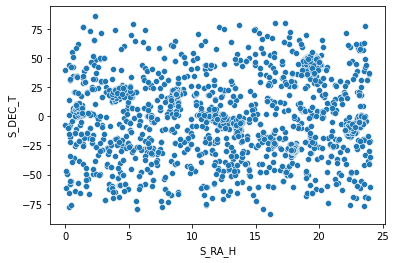

In [14]:
sns.scatterplot(data=df, x='S_RA_H', y='S_DEC_T')

<AxesSubplot:xlabel='P_HABZONE_CON', ylabel='count'>

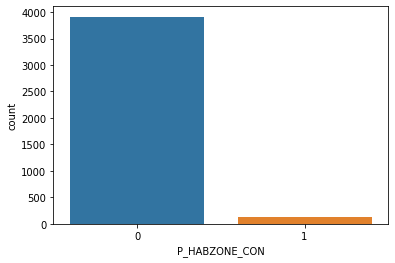

In [15]:
sns.countplot(data=df, x='P_HABZONE_CON')

La media es:  273.33208
779.9395922500001
1598
133.42341052843923
132.4208387444425
1.9757625
3136
0.2699641211430238
90.10715904396987
0.10975596800000001
3427
0.014559733929722374
67.65057622304926


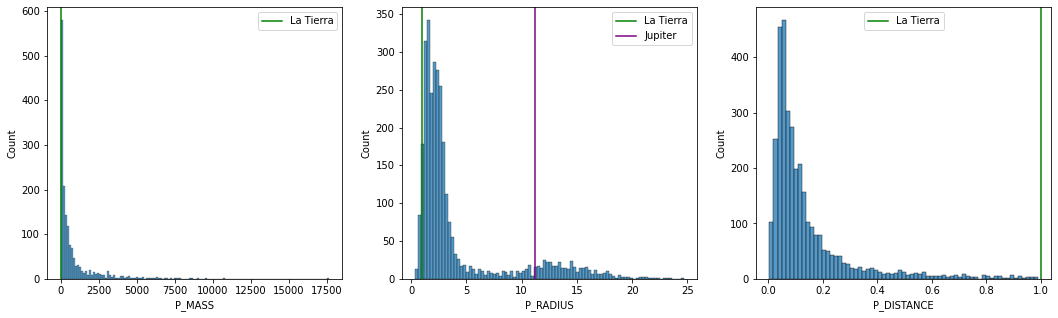

In [21]:
fig, ax = plt.subplots(ncols=3, figsize=(18, 5))
print('La media es: ', df['P_MASS'].median())
sns.histplot(ax=ax[0], data=df, x='P_MASS', bins=bins_freedman(df['P_MASS']))
ax[0].axvline(x= 1, c='green', label='La Tierra')
ax[0].legend()
sns.histplot(ax=ax[1], data=df[df['P_RADIUS'] < 25], x='P_RADIUS', bins=bins_freedman(df[df['P_RADIUS'] < 25]['P_RADIUS']))
ax[1].axvline(x= 1, c='green', label='La Tierra')
ax[1].axvline(x= 11.21, c='purple', label='Jupiter')
ax[1].legend()
sns.histplot(ax=ax[2], data=df[df['P_DISTANCE'] < 1], x='P_DISTANCE', bins=bins_freedman(df[df['P_DISTANCE'] < 1]['P_DISTANCE']))
ax[2].axvline(x= 1, c='green', label='La Tierra')
ax[2].legend()

<AxesSubplot:xlabel='S_DISTANCE', ylabel='Count'>

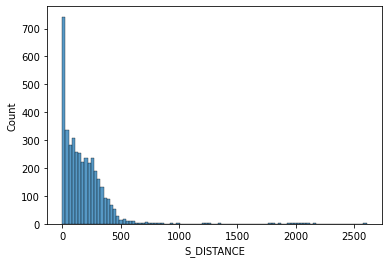

In [18]:
sns.histplot(data=df, x='S_DISTANCE')

[Text(0, 0, 'Radial Velocity'),
 Text(1, 0, 'Imaging'),
 Text(2, 0, 'Eclipse Timing Variations'),
 Text(3, 0, 'Transit'),
 Text(4, 0, 'Astrometry'),
 Text(5, 0, 'Orbital Brightness Modulation'),
 Text(6, 0, 'Pulsation Timing Variations'),
 Text(7, 0, 'Microlensing'),
 Text(8, 0, 'Transit Timing Variations'),
 Text(9, 0, 'Pulsar Timing')]

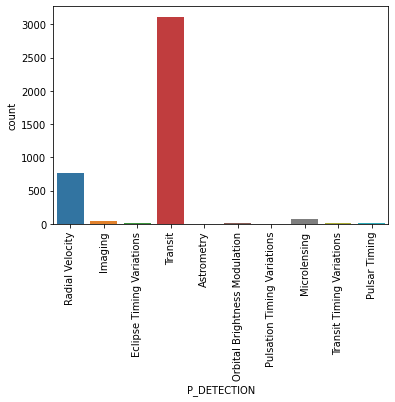

In [36]:
fig, ax = plt.subplots()
sns.countplot(data=df, x='P_DETECTION')
ax.set_xticklabels(labels=df['P_DETECTION'].unique(), rotation=90)

In [20]:
df.to_csv('../src/dashboard/df_limpio.csv')